<a href="https://colab.research.google.com/github/Rohan-Dawar/NAHSR/blob/main/High_Speed_Rail_in_North_America_Gravity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High Speed Rail North America, Gravity Model
### Author: Rohan Dawar
www.rohandawar.com


### 1) Creating Dataframe

In [ ]:
import pandas as pd

In [ ]:
# Wikipedia pages for metro areas
CANurl = 'https://en.wikipedia.org/wiki/List_of_census_metropolitan_areas_and_agglomerations_in_Canada'
USAurl = 'https://en.wikipedia.org/wiki/Metropolitan_statistical_area'
MEXurl = 'https://en.wikipedia.org/wiki/Metropolitan_areas_of_Mexico'

In [ ]:
# Canada 1M+ Metro Areas
CANdf = pd.read_html(CANurl)[0]
CANdf = CANdf.rename(columns={'Population (2020 est.)[3]':'Pop', 'Geographic name' : 'Metro'})
CANdf = CANdf[CANdf['Pop'] >= 1_000_000][['Metro', 'Pop']]
CANdf['Country'] = 'CAN'
CANdf

Metro      Pop Country
0          Toronto  6555205     CAN
1         Montreal  4364189     CAN
2        Vancouver  2737698     CAN
3          Calgary  1543283     CAN
4         Edmonton  1468926     CAN
5  Ottawa–Gatineau  1461494     CAN

In [ ]:
# USA 1M+ Metro Areas
USAdf = pd.read_html(USAurl)[1]
USAdf = USAdf.rename(columns={USAdf.columns[1] : 'Metro', '2020 Census':'Pop'})
USAdf = USAdf[USAdf['Pop'] >= 1_000_000][['Metro', 'Pop']]
USAdf['Metro'] = USAdf['Metro'].apply(lambda x : x.split('-')[0].split('–')[0].split(',')[0].split('/')[0])
USAdf.at[53, 'Metro'] = 'Honolulu'
USAdf['Country'] = 'USA'
USAdf

Metro       Pop Country
0         New York  20140470     USA
1      Los Angeles  13200998     USA
2          Chicago   9618502     USA
3           Dallas   7637387     USA
4          Houston   7122240     USA
5       Washington   6385162     USA
6     Philadelphia   6245051     USA
7            Miami   6138333     USA
8          Atlanta   6089815     USA
9           Boston   4941632     USA
10         Phoenix   4845832     USA
11   San Francisco   4749008     USA
12       Riverside   4599839     USA
13         Detroit   4392041     USA
14         Seattle   4018762     USA
15     Minneapolis   3690261     USA
16       San Diego   3298634     USA
17           Tampa   3175275     USA
18          Denver   2963821     USA
19       Baltimore   2844510     USA
20       St. Louis   2820253     USA
21         Orlando   2673376     USA
22       Charlotte   2660329     USA
23     San Antonio   2558143     USA
24        Portland   2512859     USA
25      Sacramento   2397382     USA
26      Pittsburgh   2370930     USA
27          Austin   2283371     USA
28       Las Vegas   2265461     USA
29      Cincinnati   2256884     USA
30     Kansas City   2192035     USA
31        Columbus   2138926     USA
32    Indianapolis   2111040     USA
33       Cleveland   2088251     USA
34        San Jose   2000468     USA
35       Nashville   1989519     USA
36  Virginia Beach   1799674     USA
37      Providence   1676579     USA
38    Jacksonville   1605848     USA
39       Milwaukee   1574731     USA
40   Oklahoma City   1425695     USA
41         Raleigh   1413982     USA
42         Memphis   1337779     USA
43        Richmond   1314434     USA
44      Louisville   1285439     USA
45     New Orleans   1271845     USA
46  Salt Lake City   1257936     USA
47        Hartford   1213531     USA
48         Buffalo   1166902     USA
49      Birmingham   1115289     USA
50       Rochester   1090135     USA
51    Grand Rapids   1087592     USA
52          Tucson   1043433     USA
53        Honolulu   1016508     USA
54           Tulsa   1015331     USA
55          Fresno   1008654     USA

In [ ]:
# Mexico 1M+ Metro Areas
MEXdf = pd.read_html(MEXurl)[0]
MEXdf = MEXdf.rename(columns={'2020 Census':'Pop', 'Metropolitan area' : 'Metro'})
MEXdf = MEXdf[MEXdf['Pop'] >= 1_000_000][['Metro', 'Pop']]
MEXdf.at[0, 'Metro'] = 'Mexico City'
MEXdf['Country'] = 'MEX'
MEXdf

Metro       Pop Country
0       Mexico City  21804515     MEX
1         Monterrey   5341171     MEX
2       Guadalajara   5286642     MEX
3   Puebla-Tlaxcala   3199530     MEX
4            Toluca   2353924     MEX
5           Tijuana   2157853     MEX
6              León   1924771     MEX
7         Querétaro   1594212     MEX
8            Juárez   1512450     MEX
9         La Laguna   1434283     MEX
10           Mérida   1316088     MEX
11  San Luis Potosí   1271366     MEX
12   Aguascalientes   1140916     MEX
13         Mexicali   1049792     MEX
14         Saltillo   1031779     MEX
15       Cuernavaca   1028589     MEX
16         Culiacán   1003530     MEX

In [ ]:
# Combining into main df
df = USAdf.append(MEXdf).append(CANdf).reset_index().drop(columns='index').sort_values(by='Pop', ascending=False)
# Total Number of Metro Areas:
len(df)

79

In [ ]:
# This df contains every 1M+ metro in NA (CAN, USA, MEX)
df = df.reset_index().drop(columns='index')
df

Metro       Pop Country
0   Mexico City  21804515     MEX
1      New York  20140470     USA
2   Los Angeles  13200998     USA
3       Chicago   9618502     USA
4        Dallas   7637387     USA
..          ...       ...     ...
74   Cuernavaca   1028589     MEX
75     Honolulu   1016508     USA
76        Tulsa   1015331     USA
77       Fresno   1008654     USA
78     Culiacán   1003530     MEX

[79 rows x 3 columns]

## Getting City Coordniates

In [ ]:
# Packages to find coordinates from city name string
!pip install geopy --quiet
!pip install Nominatim --quiet
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderServiceError
import geopy.distance

In [ ]:
# Function gets coordinates given city name string
def get_coords(city, country=None):
    try:
      geolocator = Nominatim(user_agent="my-application");
      if country:
        loc = geolocator.geocode(city+','+ country, timeout=None)
      else:
        loc = geolocator.geocode(city, timeout=None)
      return (loc.latitude,loc.longitude)
    except AttributeError:
      print(f'Error for {city}')
      return (0,0)
    except GeocoderTimedOut:
      print(f'Error for {city}')
      pass

In [ ]:
# Add city coordinates to main dataframe
df['cds'] = df['Metro'].apply(get_coords)

In [ ]:
''' Manual Coordinate Fixes:
La Lagua : (24.366667, -102.366667)
Merida : (20.97, -89.62)
Leon : (21.116667, -101.683333)
Birmingham : (33.524755, -86.81274)
Juarez (Chihuahua) : (31.738581, -106.487014)
'''

' Manual Coordinate Fixes:\nLa Lagua : (24.366667, -102.366667)\nMerida : (20.97, -89.62)\nLeon : (21.116667, -101.683333)\nBirmingham : (33.524755, -86.81274)\nJuarez (Chihuahua) : (31.738581, -106.487014)\n'

In [ ]:
# La Laguna:
df.at[55, 'cds'] = (24.366667, -102.366667)

# Leon:
df.at[45, 'cds'] = (21.116667, -101.683333)

# Merida:
df.at[59, 'cds'] = (20.97, -89.62)

# Birmingham
df.at[68, 'cds'] = (33.524755, -86.81274)

# Juarez:
df.at[52, 'cds'] = (31.738581, -106.487014)

## Benchmark, International HSR Route Gravities

In [ ]:
# International Route Benchmarks:
INbench = pd.read_csv('/content/HSRbenchmarks.csv')
INbench['Route'] = INbench.apply(lambda row: f'{row["City 1"]} - {row["City 2"]}', axis=1 )
INbench['normRound'] = INbench['normalized'].apply(lambda x : round(x, 2))
INbench['HHSR'] = INbench["Has HSR"].astype(str)

In [ ]:
# This is the exact G value (pre-normalization) of Madrid-Barcelona
benchmarkG = 132_814_533

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(INbench, x='normalized', y='Route', color='HHSR', text='normRound', color_discrete_sequence=["maroon", "forestgreen"], orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='International HSR Route Feasability Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Gravity (Madrid-Barcelona = 1)')
fig.show()

## Getting Gravity Between Cities

In [ ]:
# Function to calculate gravity:
def getGravity(pop1, pop2, c1, c2):
  d = geopy.distance.vincenty(c1, c2).km
  G = (pop1*pop2) / (d*d)
  return G

In [ ]:
# Generate Column Names:
for m in df['Metro']:
  col = f'GV: {m}'
  df[col] = None

In [ ]:
# For Every City, Calculate G with every other city:
for i in range(len(df)):
  row = df.loc[i]
  for Oi in range(len(df)):
    if Oi != i:
      Orow = df.loc[Oi]
      Ometro = Orow['Metro']
      col = f'GV: {Ometro}'
      df.at[i, col] = getGravity(df.loc[i]['Pop'], df.loc[Oi]['Pop'], df.loc[i]['cds'], df.loc[Oi]['cds'])

In [ ]:
# melted dataframe (mdf) of city destination (route) gravs:
mdf = pd.melt(df, id_vars=['Metro'], value_vars=df.filter(like='GV: ').columns)
mdf.head(10)

Metro         variable        value
0   Mexico City  GV: Mexico City         None
1      New York  GV: Mexico City  3.89526e+07
2   Los Angeles  GV: Mexico City  4.64493e+07
3       Chicago  GV: Mexico City  2.84378e+07
4        Dallas  GV: Mexico City  7.43505e+07
5       Houston  GV: Mexico City   1.0687e+08
6       Toronto  GV: Mexico City  1.34743e+07
7    Washington  GV: Mexico City  1.51751e+07
8  Philadelphia  GV: Mexico City  1.30659e+07
9         Miami  GV: Mexico City  3.13133e+07

In [ ]:
# Display Full DF
pd.set_option('display.max_rows', None)

In [ ]:
# Normalize to Madrid-Barcelona Gravity = 1 (MBGU)
mdf['MBGU'] = mdf['value'] / benchmarkG

In [ ]:
# Sort values by MGBU
mdf = mdf.sort_values(by='MBGU', ascending=False).dropna()

In [ ]:
# Clean Destination Column
mdf['Destination'] = mdf['variable'].apply(lambda x : x.split('GV: ')[-1])

In [ ]:
# Create Route Column
mdf['Route'] = mdf.apply(lambda row: f'{row["Metro"]} - {row["Destination"]}', axis=1 )

In [ ]:
# Reset Index
mdf = mdf.reset_index()

In [ ]:
# Cdf is the melted route dataframe with routes only showing once (in mdf they appear twice as origin and destination are flipped)
Cdf = mdf.iloc[::2].drop(columns=['index'])

In [ ]:
import math

In [ ]:
# Count the number of route combinations in a set with n cities:
def numCombinations(n):
  d = math.factorial(n) / math.factorial(n-2)
  return int(d/2)

In [ ]:
# Function to determine if a route is domestic or international
def isDomestic(row):
  origin = row['Metro']
  dest = row['Destination']
  oCountry = df[df['Metro'] == origin]['Country'].values[0]
  dCountry = df[df['Metro'] == dest]['Country'].values[0]
  if oCountry == dCountry:
    return 'Domestic'
  else:
    if 'USA' in [oCountry, dCountry] and 'CAN' in [oCountry, dCountry]:
      return 'USA-CAN'
    elif 'USA' in [oCountry, dCountry] and 'MEX' in [oCountry, dCountry]:
      return 'USA-MEX'
    elif 'CAN' in [oCountry, dCountry] and 'MEX' in [oCountry, dCountry]:
      return 'CAN-MEX'

In [ ]:
# Preview of Cdf:
Cdf.reset_index(drop=True, inplace=True)
Cdf['isDom'] = Cdf.apply(lambda row : isDomestic(row), axis=1)
Cdf

Metro  ...     isDom
0         Mexico City  ...  Domestic
1         Los Angeles  ...  Domestic
2           San Diego  ...   USA-MEX
3        Philadelphia  ...  Domestic
4         Mexico City  ...  Domestic
5           Baltimore  ...  Domestic
6         Mexico City  ...  Domestic
7            San Jose  ...  Domestic
8              Boston  ...  Domestic
9         Los Angeles  ...  Domestic
10           New York  ...  Domestic
11             Boston  ...  Domestic
12          Querétaro  ...  Domestic
13           Saltillo  ...  Domestic
14       Philadelphia  ...  Domestic
15           New York  ...  Domestic
16            Chicago  ...  Domestic
17            Buffalo  ...   USA-CAN
18          Baltimore  ...  Domestic
19          Riverside  ...  Domestic
20      San Francisco  ...  Domestic
21           New York  ...  Domestic
22             Toluca  ...  Domestic
23        Los Angeles  ...   USA-MEX
24            Orlando  ...  Domestic
25        Mexico City  ...  Domestic
26           New York  ...  Domestic
27            Detroit  ...  Domestic
28           New York  ...   USA-CAN
29            Houston  ...  Domestic
30        San Antonio  ...  Domestic
31        Mexico City  ...  Domestic
32          Riverside  ...   USA-MEX
33           Richmond  ...  Domestic
34               León  ...  Domestic
35           New York  ...   USA-CAN
36          Rochester  ...   USA-CAN
37          Vancouver  ...   USA-CAN
38             Austin  ...  Domestic
39       Indianapolis  ...  Domestic
40            Chicago  ...  Domestic
41           Hartford  ...  Domestic
42            Toronto  ...   USA-CAN
43       Grand Rapids  ...  Domestic
44         Sacramento  ...  Domestic
45          Monterrey  ...  Domestic
46    Ottawa–Gatineau  ...  Domestic
47          Las Vegas  ...  Domestic
48     Aguascalientes  ...  Domestic
49        Mexico City  ...  Domestic
50             Austin  ...  Domestic
51      San Francisco  ...  Domestic
52    Puebla-Tlaxcala  ...  Domestic
53        San Antonio  ...  Domestic
54        Los Angeles  ...  Domestic
55     Virginia Beach  ...  Domestic
56       Indianapolis  ...  Domestic
57            Seattle  ...  Domestic
58         Cincinnati  ...  Domestic
59         Pittsburgh  ...  Domestic
60         Providence  ...  Domestic
61              Miami  ...  Domestic
62            Phoenix  ...  Domestic
63     Virginia Beach  ...  Domestic
64       Philadelphia  ...  Domestic
65         Pittsburgh  ...  Domestic
66          St. Louis  ...  Domestic
67              Miami  ...  Domestic
68           Mexicali  ...   USA-MEX
69            Toronto  ...   USA-CAN
70            Chicago  ...  Domestic
71            Detroit  ...  Domestic
72         Pittsburgh  ...  Domestic
73               León  ...  Domestic
74             Toluca  ...  Domestic
75         Louisville  ...  Domestic
76       Philadelphia  ...   USA-CAN
77            Detroit  ...  Domestic
78           New York  ...  Domestic
79           Mexicali  ...   USA-MEX
80            Atlanta  ...  Domestic
81             Boston  ...   USA-CAN
82         Cincinnati  ...  Domestic
83         Washington  ...   USA-CAN
84     Aguascalientes  ...  Domestic
85            Toronto  ...   USA-CAN
86           Richmond  ...  Domestic
87             Fresno  ...  Domestic
88        Mexico City  ...  Domestic
89            Atlanta  ...  Domestic
90         Pittsburgh  ...   USA-CAN
91          La Laguna  ...  Domestic
92             Dallas  ...  Domestic
93             Dallas  ...  Domestic
94           Montreal  ...  Domestic
95           Mexicali  ...  Domestic
96            Buffalo  ...  Domestic
97        Los Angeles  ...  Domestic
98            Chicago  ...  Domestic
99          Cleveland  ...  Domestic
100      Jacksonville  ...  Domestic
101           Houston  ...   USA-MEX
102          New York  ...  Domestic
103    Virginia Beach  ...  Domestic
104          Columbus  ...  Domestic
105         Las Vegas  ...  Domestic
106           Atlanta  ...  Domestic
107   Ottawa–Gatinea

# 2) Corridors and Megaregions:

In [ ]:
# MegaRegions:

MegaRegionDict = {
'Mexico City' : 'Central Mexico',
 'New York' : 'Northeast',
 'Los Angeles' : 'Southern California',
 'Chicago' : 'Great Lakes',
 'Dallas': 'Texas Triangle',
 'Houston' : 'Texas Triangle',
 'Toronto' : 'Great Lakes',
 'Washington' : 'Northeast',
 'Philadelphia' : 'Northeast',
 'Miami' : 'Florida',
 'Atlanta' : 'Piedmont Atlantic',
 'Monterrey' : 'Northern Mexico',
 'Guadalajara' : 'Central Mexico',
 'Boston' : 'Northeast',
 'Phoenix' : 'Arizona Sun Corridor',
 'San Francisco' : 'Northern California',
 'Riverside' : 'Southern California',
 'Detroit' : 'Great Lakes',
 'Montreal' : 'Great Lakes',
 'Seattle' : 'Cascadia',
 'Minneapolis' : 'Great Lakes',
 'San Diego' : 'Southern California',
 'Puebla-Tlaxcala' : 'Central Mexico',
 'Tampa' : 'Florida',
 'Denver' : 'Front Range',
 'Baltimore' : 'Northeast',
 'St. Louis' : 'Great Lakes',
 'Vancouver' : 'Cascadia',
 'Orlando' : 'Florida',
 'Charlotte' : 'Piedmont Atlantic',
 'San Antonio' : 'Texas Triangle',
 'Portland' : 'Cascadia',
 'Sacramento' : 'Northern California',
 'Pittsburgh' : 'Great Lakes',
 'Toluca' : 'Central Mexico',
 'Austin' : 'Texas Triangle',
 'Las Vegas' : 'Southern California',
 'Cincinnati' : 'Great Lakes',
 'Kansas City' : 'Great Lakes',
 'Tijuana' : 'Southern California',
 'Columbus' : 'Great Lakes',
 'Indianapolis' : 'Great Lakes',
 'Cleveland' : 'Great Lakes',
 'San Jose' : 'Northern California',
 'Nashville' : 'Piedmont Atlantic',
 'León' : 'Central Mexico',
 'Virginia Beach' : 'Northeast',
 'Providence' : 'Northeast',
 'Jacksonville' : 'Florida',
 'Querétaro' : 'Central Mexico',
 'Milwaukee' : 'Great Lakes',
 'Calgary' : 'Alberta',
 'Juárez' : 'Other',
 'Edmonton' : 'Alberta',
 'Ottawa–Gatineau' : 'Great Lakes',
 'La Laguna' : 'Northern Mexico',
 'Oklahoma City' : 'Texas Triangle',
 'Raleigh' : 'Piedmont Atlantic',
 'Memphis' : 'Piedmont Atlantic',
 'Mérida' : 'Other',
 'Richmond' : 'Northeast',
 'Louisville' : 'Great Lakes',
 'New Orleans' : 'Gulf Coast',
 'San Luis Potosí' : 'Central Mexico',
 'Salt Lake City' : 'Front Range',
 'Hartford' : 'Northeast',
 'Buffalo' : 'Great Lakes',
 'Aguascalientes' : 'Central Mexico',
 'Birmingham' : 'Piedmont Atlantic',
 'Rochester' : 'Great Lakes',
 'Grand Rapids' : 'Great Lakes',
 'Mexicali' : 'Southern California',
 'Tucson' : 'Arizona Sun Corridor',
 'Saltillo' : 'Northern Mexico',
 'Cuernavaca' : 'Central Mexico',
 'Honolulu' : 'Other',
 'Tulsa' : 'Texas Triangle',
 'Fresno' : 'Northern California',
 'Culiacán' : 'Other'}

In [ ]:
# Unique Megaregions:
pd.DataFrame(MegaRegionDict, index=[0]).T.reset_index()[0].unique()

array(['Central Mexico', 'Northeast', 'Southern California',
       'Great Lakes', 'Texas Triangle', 'Florida', 'Piedmont Atlantic',
       'Northern Mexico', 'Arizona Sun Corridor', 'Northern California',
       'Cascadia', 'Front Range', 'Alberta', 'Other', 'Gulf Coast'],
      dtype=object)

In [ ]:
# Megaregion Colors:
MRcolormap = {'Central Mexico' : 'rgb(19, 207, 182)',
               'Northern Mexico' : 'rgb(156, 87, 7)',
'Great Lakes' : 'rgb(231, 147, 29)',
'Texas Triangle' : 'rgb(2, 152, 77)',
'Piedmont Atlantic' : 'rgb(0, 139, 135)',
'Northeast' : 'rgb(237, 23, 79)',
'Florida' : 'rgb(130, 90, 166)',
'Southern California' : 'rgb(255, 230, 141)',
'Northern California' : 'rgb(111, 75, 140)',
'Cascadia' : 'rgb(0, 72, 18)'}

In [ ]:
# Add megaregions to the main dataframe
df['MegaRegion'] = df['Metro'].map(MegaRegionDict)

In [ ]:
# Corridors:

CorridorDict = {
'Amtrak Acela' : ['Boston', 'Providence', 'New York', 'Philadelphia', 'Baltimore', 'Washington'],
'Texas Central' : ['Dallas', 'Houston'],
'Florida Brightline' : ['Miami', 'Orlando'],
'California HSR' : ['San Francisco', 'San Jose', 'Sacramento', 'Fresno', 'Los Angeles', 'Riverside', 'San Diego'],
'VIA Rail' : ['Toronto', 'Ottawa–Gatineau', 'Montreal'],
'Amtrak Cascades' : ['Portland', 'Seattle', 'Vancouver'],
'Tren Interurbano' : ['Mexico City', 'Toluca']}

CorridorDF = pd.DataFrame(
    columns=['Corridor', 'Cities', 'TotalG', 'TotalPop'])

In [ ]:
# Add corrdiros stats into CorridorDF:
for c in CorridorDict:
  L = CorridorDict[c]
  CorrDF = Cdf[(Cdf['Metro'].isin(L)) & (Cdf['Destination'].isin(L))]
  G = CorrDF['MBGU'].sum()
  P = df[df['Metro'].isin(L)]['Pop'].sum()
  CorridorDF = CorridorDF.append(
    {'Corridor' : c,
     'Cities': L,
     'TotalG' : G,
     'TotalPop' : P}, ignore_index=True)

In [ ]:
CorridorDF

Corridor  ...  TotalPop
0        Amtrak Acela  ...  42233404
1       Texas Central  ...  14759627
2  Florida Brightline  ...   8811709
3      California HSR  ...  31254983
4            VIA Rail  ...  12380888
5     Amtrak Cascades  ...   9269319
6    Tren Interurbano  ...  24158439

[7 rows x 4 columns]

In [ ]:
# Calculate Gravity Per Capita of Corridors:
CorridorDF['GravityPerCapita'] = CorridorDF['TotalG'] / CorridorDF['TotalPop']

In [ ]:
# See 9 decimal places:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [ ]:
# Highest G corridors:
CorridorDF.sort_values(by='GravityPerCapita', ascending=False)

Corridor  ... GravityPerCapita
6    Tren Interurbano  ...      0.000004895
3      California HSR  ...      0.000003821
0        Amtrak Acela  ...      0.000003692
5     Amtrak Cascades  ...      0.000000423
4            VIA Rail  ...      0.000000251
1       Texas Central  ...      0.000000213
2  Florida Brightline  ...      0.000000130

[7 rows x 5 columns]

In [ ]:
# Ground = Rounded Gravity to 2 decimal places
Cdf['Ground'] = Cdf['MBGU'].apply(lambda x : round(x, 2))

In [ ]:
# Fill empty values with string 'Other'
Cdf.fillna('Other', inplace=True)

In [ ]:
# Function to assign Intra-Megaregion to routes:
def assignMR(row):
  Origin = row['Metro']
  Dest = row['Destination']
  if MegaRegionDict[Origin] == MegaRegionDict[Dest]:
    return MegaRegionDict[Origin]

In [ ]:
# Add megaregion to routes:
Cdf['Megaregion'] = Cdf.apply(lambda row: assignMR(row), axis=1)

In [ ]:
# All Routes Dataframe:
Cdf.to_csv('NAHSR.csv')
Cdf

Metro             variable  ...        Ground            Megaregion
0         Mexico City           GV: Toluca  ... 118.250000000        Central Mexico
1         Los Angeles        GV: Riverside  ...  73.260000000   Southern California
2           San Diego          GV: Tijuana  ...  58.150000000   Southern California
3        Philadelphia         GV: New York  ...  56.380000000             Northeast
4         Mexico City       GV: Cuernavaca  ...  51.020000000        Central Mexico
5           Baltimore       GV: Washington  ...  41.590000000             Northeast
6         Mexico City  GV: Puebla-Tlaxcala  ...  26.830000000        Central Mexico
7            San Jose    GV: San Francisco  ...  15.540000000   Northern California
8              Boston       GV: Providence  ...  14.150000000             Northeast
9         Los Angeles        GV: San Diego  ...  10.230000000   Southern California
10           New York       GV: Washington  ...   8.960000000             Northeast
11             Boston         GV: New York  ...   7.970000000             Northeast
12          Querétaro      GV: Mexico City  ...   7.740000000        Central Mexico
13           Saltillo        GV: Monterrey  ...   7.620000000       Northern Mexico
14       Philadelphia       GV: Washington  ...   7.540000000             Northeast
15           New York         GV: Hartford  ...   7.130000000             Northeast
16            Chicago        GV: Milwaukee  ...   6.630000000           Great Lakes
17            Buffalo          GV: Toronto  ...   6.440000000           Great Lakes
18          Baltimore     GV: Philadelphia  ...   6.420000000             Northeast
19          Riverside        GV: San Diego  ...   5.930000000   Southern California
20      San Francisco       GV: Sacramento  ...   5.910000000   Northern California
21           New York        GV: Baltimore  ...   5.800000000             Northeast
22             Toluca       GV: Cuernavaca  ...   4.980000000        Central Mexico
23        Los Angeles          GV: Tijuana  ...   4.890000000   Southern California
24            Orlando            GV: Tampa  ...   4.110000000               Florida
25        Mexico City      GV: Guadalajara  ...   4.090000000        Central Mexico
26           New York       GV: Providence  ...   4.070000000             Northeast
27            Detroit        GV: Cleveland  ...   3.280000000           Great Lakes
28           New York          GV: Toronto  ...   3.270000000                  None
29            Houston           GV: Dallas  ...   3.140000000        Texas Triangle
30        San Antonio           GV: Austin  ...   3.120000000        Texas Triangle
31        Mexico City             GV: León  ...   2.990000000        Central Mexico
32          Riverside          GV: Tijuana  ...   2.710000000   Southern California
33           Richmond       GV: Washington  ...   2.650000000             Northeast
34               León      GV: Guadalajara  ...   2.390000000        Central Mexico
35           New York         GV: Montreal  ...   2.330000000                  None
36          Rochester          GV: Toronto  ...   2.280000000           Great Lakes
37          Vancouver          GV: Seattle  ...   2.220000000              Cascadia
38             Austin          GV: Houston  ...   2.200000000        Texas Triangle
39       Indianapolis          GV: Chicago  ...   2.180000000           Great Lakes
40            Chicago          GV: Detroit  ...   2.180000000           Great Lakes
41           Hartford           GV: Boston  ...   1.990000000             Northeast
42            Toronto          GV: Detroit  ...   1.960000000           Great Lakes
43       Grand Rapids          GV: Chicago  ...   1.940000000           Great Lakes
44         Sacramento         GV: San Jose  ...   1.780000000   Northern California
45          Monterrey      GV: Mexico City  ...   1.780000000                  None
46    Ottawa–Gatineau         GV: Montreal  ...   1.690000000       

In [ ]:
# Routes higher than 1 MBGU
Cdf[Cdf['MBGU'] >= 1]

Metro             variable  ...        Ground            Megaregion
0       Mexico City           GV: Toluca  ... 118.250000000        Central Mexico
1       Los Angeles        GV: Riverside  ...  73.260000000   Southern California
2         San Diego          GV: Tijuana  ...  58.150000000   Southern California
3      Philadelphia         GV: New York  ...  56.380000000             Northeast
4       Mexico City       GV: Cuernavaca  ...  51.020000000        Central Mexico
5         Baltimore       GV: Washington  ...  41.590000000             Northeast
6       Mexico City  GV: Puebla-Tlaxcala  ...  26.830000000        Central Mexico
7          San Jose    GV: San Francisco  ...  15.540000000   Northern California
8            Boston       GV: Providence  ...  14.150000000             Northeast
9       Los Angeles        GV: San Diego  ...  10.230000000   Southern California
10         New York       GV: Washington  ...   8.960000000             Northeast
11           Boston         GV: New York  ...   7.970000000             Northeast
12        Querétaro      GV: Mexico City  ...   7.740000000        Central Mexico
13         Saltillo        GV: Monterrey  ...   7.620000000       Northern Mexico
14     Philadelphia       GV: Washington  ...   7.540000000             Northeast
15         New York         GV: Hartford  ...   7.130000000             Northeast
16          Chicago        GV: Milwaukee  ...   6.630000000           Great Lakes
17          Buffalo          GV: Toronto  ...   6.440000000           Great Lakes
18        Baltimore     GV: Philadelphia  ...   6.420000000             Northeast
19        Riverside        GV: San Diego  ...   5.930000000   Southern California
20    San Francisco       GV: Sacramento  ...   5.910000000   Northern California
21         New York        GV: Baltimore  ...   5.800000000             Northeast
22           Toluca       GV: Cuernavaca  ...   4.980000000        Central Mexico
23      Los Angeles          GV: Tijuana  ...   4.890000000   Southern California
24          Orlando            GV: Tampa  ...   4.110000000               Florida
25      Mexico City      GV: Guadalajara  ...   4.090000000        Central Mexico
26         New York       GV: Providence  ...   4.070000000             Northeast
27          Detroit        GV: Cleveland  ...   3.280000000           Great Lakes
28         New York          GV: Toronto  ...   3.270000000                  None
29          Houston           GV: Dallas  ...   3.140000000        Texas Triangle
30      San Antonio           GV: Austin  ...   3.120000000        Texas Triangle
31      Mexico City             GV: León  ...   2.990000000        Central Mexico
32        Riverside          GV: Tijuana  ...   2.710000000   Southern California
33         Richmond       GV: Washington  ...   2.650000000             Northeast
34             León      GV: Guadalajara  ...   2.390000000        Central Mexico
35         New York         GV: Montreal  ...   2.330000000                  None
36        Rochester          GV: Toronto  ...   2.280000000           Great Lakes
37        Vancouver          GV: Seattle  ...   2.220000000              Cascadia
38           Austin          GV: Houston  ...   2.200000000        Texas Triangle
39     Indianapolis          GV: Chicago  ...   2.180000000           Great Lakes
40          Chicago          GV: Detroit  ...   2.180000000           Great Lakes
41         Hartford           GV: Boston  ...   1.990000000             Northeast
42          Toronto          GV: Detroit  ...   1.960000000           Great Lakes
43     Grand Rapids          GV: Chicago  ...   1.940000000           Great Lakes
44       Sacramento         GV: San Jose  ...   1.780000000   Northern California
45        Monterrey      GV: Mexico City  ...   1.780000000                  None
46  Ottawa–Gatineau         GV: Montreal  ...   1.690000000           Great Lakes
47        Las Vegas      GV: Los Angeles  ...   1.670000000   Southern Califor

In [ ]:
# Top Routes Bar:

fig = px.bar(Cdf.head(20), x='MBGU', y='Route', color='Megaregion', text='Ground', orientation='h',
             color_discrete_map=MRcolormap)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='Top North American Route Gravities Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Gravity (Madrid-Barcelona = 1)')
fig.show()

In [ ]:
# Megaregion groupby:
MRgb = pd.DataFrame(Cdf.groupby('Megaregion')['MBGU'].sum().sort_values(ascending=False).head(11)).reset_index()

In [ ]:
# Intra-Region Combined Gravities Bar:

fig = px.bar(MRgb, x='MBGU', y='Megaregion', color='Megaregion', text='MBGU', orientation='h', color_discrete_map=MRcolormap)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='North American Megaregions Combined Intra-region Route Gravities, Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Gravity (Madrid-Barcelona = 1)')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# City count function:

def Ccount(row):
  count = len(row['Cities'])
  totalG = row['TotalG']
  Ground = round(totalG, 2)
  s = f'{Ground} between {count} cities'
  return s

In [ ]:
# string column for bars chart:
CorridorDF['s'] = CorridorDF.apply(Ccount, axis=1)

In [ ]:
# MBGU on corridors:

fig = px.bar(CorridorDF, x='TotalG', y='Corridor', color='Corridor', text='s', orientation='h')
#fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='North American Combined Corridor Gravities Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Gravity (Madrid-Barcelona = 1)')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# MBGU per capita on corridors:

fig = px.bar(CorridorDF, x='GravityPerCapita', y='Corridor', color='Corridor', text='GravityPerCapita', orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='North American Combined Corridor Gravity Per Capita Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Personal Gravity (Madrid-Barcelona = 1)')
fig.show()

# Cross Border

In [ ]:
# Bar showing international route gravities:

fig = px.bar(Cdf[Cdf['isDom'] != 'Domestic'].head(20), x='MBGU', y='Route', color='isDom', text='Ground', orientation='h')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='Top North American Cross Border Route Gravities Normalized to Gravity of Madrid-Barcelona = 1')
fig.update_xaxes(title='Normalized Gravity (Madrid-Barcelona = 1)')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
import folium

In [ ]:
# Function to draw a folium map with markers and routes:
def draw_map_routes(points=True, lines=True, thresh=1):
  m = folium.Map(location=[37, -98], zoom_start=4, tiles='CartoDB positron')

  # Circles:
  if points:
    for i in range(len(df)):
      d = df.iloc[i]
      cds = d['cds']
      name = d['Metro']
      pop = d['Pop']


      folium.Circle(
        radius= (pop/200) ,
        location=[cds[0], cds[1]],
        popup = f'{name}, pop:{pop}',
        fill=True,
        tooltip = name).add_to(m)
    
    # Lines:
    if lines:
      for i in range(len(Cdf)):
        d = Cdf.iloc[i]
        G = float(d['MBGU'])

        if G >= thresh:
          originCity = d['Metro']
          destCity = d['Destination']
          #print(f'Drawing Line Between {originCity} and {destCity} with G = {G}')

          originSeries = df[df['Metro'] == originCity]
          originCoords = originSeries['cds'].values[0]

          destSeries = df[df['Metro'] == destCity]
          destCoords = destSeries['cds'].values[0]

          L = [originCoords, destCoords]

          PL = folium.PolyLine(L, line_color='#FF0000', line_weight = G)
          m.add_child(PL)

    return m

In [ ]:
# Function to convert rbg to hex string
def rbgsTOhex(rgbs):
  s = rgbs.split('(')[-1].replace(')','')
  l = s.split(',')
  return '#%02x%02x%02x' % tuple(map(int, l))

In [ ]:
# 2nd function to map routes in folium:

def draw_map_routes2(points=True, lines=True, thresh=1, cols=True):
  m = folium.Map(location=[37, -98], zoom_start=4, tiles='CartoDB positron')

  # Circles:
  if points:
    for i in range(len(df)):
      d = df.iloc[i]
      cds = d['cds']
      name = d['Metro']
      pop = d['Pop']
      if cols:
        try:
          col = rbgsTOhex(MRcolormap[d['MegaRegion']])
        except KeyError:
            col = '#b0adac'
      else:
        col = '#b0adac'

      folium.Circle(
        radius= (pop/200) ,
        location=[cds[0], cds[1]],
        popup = f'{name}, pop:{pop}',
        color = col,
        fill=True,
        tooltip = name).add_to(m)
    
    # Lines:
    if lines:
      for i in range(len(Cdf)):
        d = Cdf.iloc[i]
        G = float(d['MBGU'])

        if G >= thresh:
          originCity = d['Metro']
          destCity = d['Destination']
          #print(f'Drawing Line Between {originCity} and {destCity} with G = {G}')
          if cols:
            try:
              mrcol = rbgsTOhex(MRcolormap[d['Megaregion']])
              col = mrcol
            except KeyError:
              col = '#b0adac'
          else:
            col = '#b0adac'

          originSeries = df[df['Metro'] == originCity]
          originCoords = originSeries['cds'].values[0]

          destSeries = df[df['Metro'] == destCity]
          destCoords = destSeries['cds'].values[0]

          L = [originCoords, destCoords]
          PL = folium.PolyLine(L, color=col, line_weight = G)
          m.add_child(PL)

    return m

In [ ]:
v = draw_map_routes(lines=False)
v

In [ ]:
v = draw_map_routes2(lines=True, thresh=1, cols=True)
v

In [ ]:
v = draw_map_routes(thresh=4)
v

In [ ]:
v = draw_map_routes(thresh=3)
v

In [ ]:
v = draw_map_routes(thresh=2)
v

In [ ]:
v = draw_map_routes(thresh=1)
v

In [ ]:
v = draw_map_routes(thresh=0.8)
v

In [ ]:
v = draw_map_routes(thresh=0.6)
v

In [ ]:
v = draw_map_routes(thresh=0.4)
v

In [ ]:
v = draw_map_routes(thresh=.2)
v

In [ ]:
v = draw_map_routes(thresh=.1)
v

## Geopandas, GIF

In [ ]:
# Installing packages for geopandas mapping
!pip install geopandas --quiet
!pip install descartes --quiet
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Loading continent shapefile, requires uplaod from supplemental files
continents = gpd.read_file('/content/4a7d27e1-84a3-4d6a-b4c2-6b6919f3cf4b202034-1-2zg7ul.ht5ut.shp')

In [ ]:
# Selecting North American Continent
naGEO = continents[continents['CONTINENT'] == 'North America']
naGEO = naGEO.to_crs(4269)

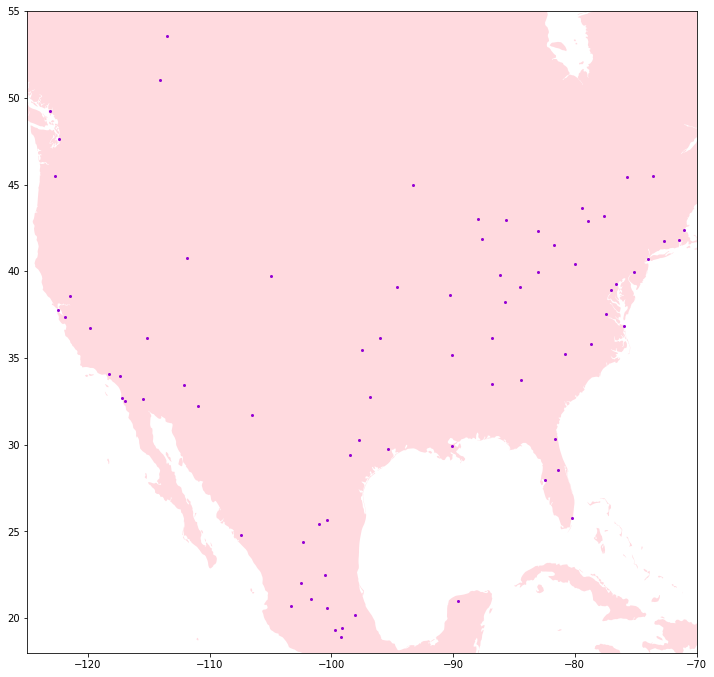

In [ ]:
# North America map:
fig, ax = plt.subplots(figsize=(12,12))
naGEO.plot(ax=ax, color='lightpink', alpha=0.5)
plt.xlim((-125,-70))
plt.ylim((18,55))

for i in range(len(df)):
  d = df.iloc[i]
  name = d['Metro']
  cds = d['cds']
  plt.plot(cds[1], cds[0], marker='o', markersize=2, color= 'darkviolet', alpha=1)

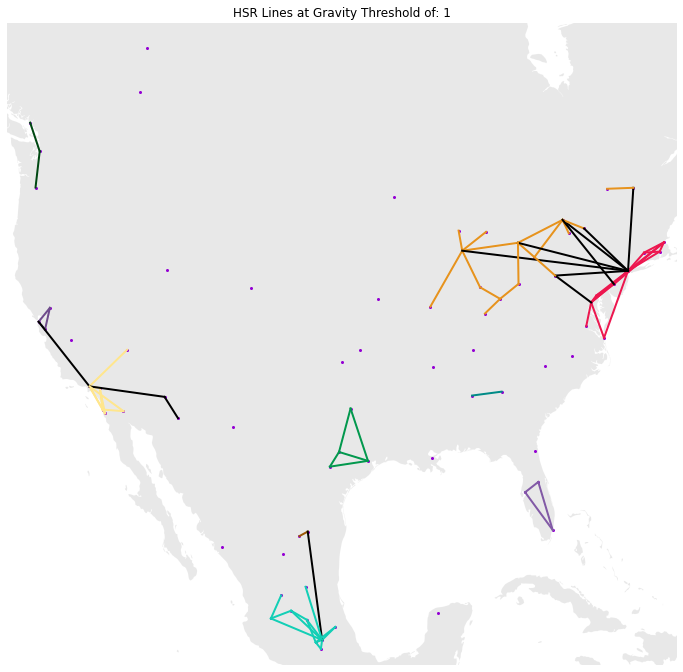

In [ ]:
# Route Lines mapping

fig, ax = plt.subplots(figsize=(12,12))
ax.axis('off')
naGEO.plot(ax=ax, color='lightgray', alpha=0.5)
plt.xlim((-125,-70))
plt.ylim((18,55))

# Points
for i in range(len(df)):
  d = df.iloc[i]
  name = d['Metro']
  cds = d['cds']
  plt.plot(cds[1], cds[0], marker='o', markersize=2, color= 'darkviolet', alpha=1)


thresh = 1
plt.title(f'HSR Lines at Gravity Threshold of: {thresh}')

# Lines:
for i in range(len(Cdf)):
  d = Cdf.iloc[i]
  G = float(d['MBGU'])

  if G >= thresh:
    originCity = d['Metro']
    destCity = d['Destination']

    originSeries = df[df['Metro'] == originCity]
    originCoords = originSeries['cds'].values[0]
    OCflip = (originCoords[1], originCoords[0])

    destSeries = df[df['Metro'] == destCity]
    destCoords = destSeries['cds'].values[0]
    DCflip = (destCoords[1], destCoords[0])

    x1 = [originCoords[1], destCoords[1]]
    y1 = [originCoords[0], destCoords[0]]

    try:
      c = rbgsTOhex(MRcolormap[d['Megaregion']])
    except KeyError:
      c = 'black'

    plt.plot(x1, y1, linewidth=2, color=c, alpha=1)

fig.savefig('test.png')

In [ ]:
# List of MBGU thresholds to map for the gif:
threshlist = [100, 75, 50, 40, 25, 13, 10, 7.5, 6.5, 5.5, 4, 3, 2, 1,
              0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5,
              .45, .4, .35, .3, .25, .2]

In [ ]:
import os

In [ ]:
if not os.path.exists("maps"):
    os.mkdir("maps")

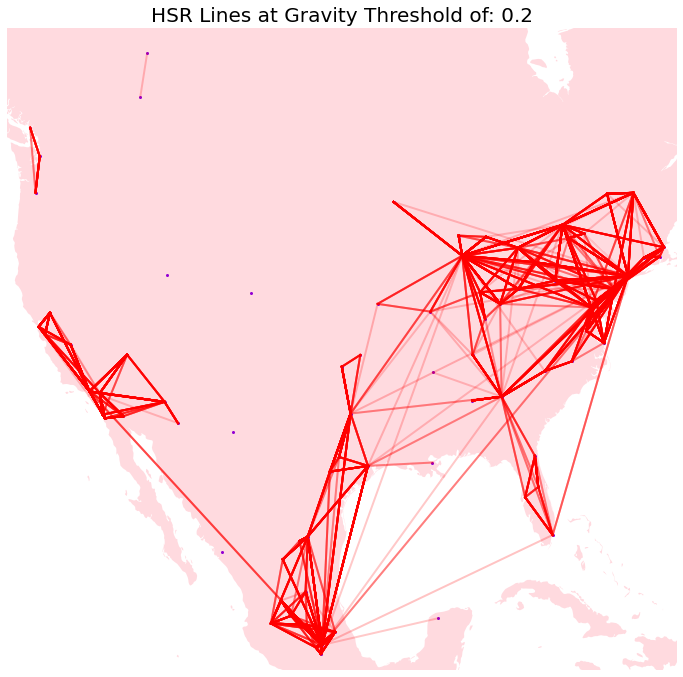

In [ ]:
# Mapping at threshold
fig, ax = plt.subplots(figsize=(12,12))
ax.axis('off')
naGEO.plot(ax=ax, color='lightpink', alpha=0.5)
plt.xlim((-125,-70))
plt.ylim((18,55))

# Points
for i in range(len(df)):
  d = df.iloc[i]
  name = d['Metro']
  cds = d['cds']
  plt.plot(cds[1], cds[0], marker='o', markersize=2, color= 'darkviolet', alpha=1)


for e, t in enumerate(threshlist):
  plt.title(f'HSR Lines at Gravity Threshold of: {t}', fontsize=20)

  # Lines:
  for i in range(len(Cdf)):
    d = Cdf.iloc[i]
    G = float(d['MBGU'])

    if G >= t:
      originCity = d['Metro']
      destCity = d['Destination']

      originSeries = df[df['Metro'] == originCity]
      originCoords = originSeries['cds'].values[0]
      OCflip = (originCoords[1], originCoords[0])

      destSeries = df[df['Metro'] == destCity]
      destCoords = destSeries['cds'].values[0]
      DCflip = (destCoords[1], destCoords[0])

      x1 = [originCoords[1], destCoords[1]]
      y1 = [originCoords[0], destCoords[0]]

      plt.plot(x1, y1, linewidth=2, color='red', alpha=G)

  fig.savefig(f'/content/maps/t{e}.png')

# Gif

In [ ]:
# Packes for stitching the generated maps into a gif:
!pip install pygifsicle --quiet
!sudo apt-get install gifsicle --quiet
from PIL import Image
import imageio
import natsort
from pygifsicle import optimize

Reading package lists...
Building dependency tree...
Reading state information...
gifsicle is already the newest version (1.91-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# Folder with map pngs
mapfolder = '/content/maps'
dir = os.listdir(mapfolder)

# Stitching PNGs function:
def toGIF(gifframe, outfile):
  """ Writes .gif from all .png files in relevant folder
  Args:
    gifframe: taken from main(gif) parameter, determines the duration of frames in .gif
  """

  foldername = "maps"

  onlyfiles = [f for f in natsort.natsorted(dir,reverse=False) if os.path.isfile(os.path.join(mapfolder, f))]

  # with frames as gifframe
  with imageio.get_writer(f'{outfile}.gif', mode='I', duration=gifframe) as writer:
      for filename in onlyfiles:
          image = imageio.imread(os.path.join(foldername,filename))
          writer.append_data(image)
          print(f'Stiched {filename}')
      print("GIF Stitched Successfully")

In [ ]:
toGIF(1, 'HSRlines')

Stiched t0.png
Stiched t1.png
Stiched t2.png
Stiched t3.png
Stiched t4.png
Stiched t5.png
Stiched t6.png
Stiched t7.png
Stiched t8.png
Stiched t9.png
Stiched t10.png
Stiched t11.png
Stiched t12.png
Stiched t13.png
Stiched t14.png
Stiched t15.png
Stiched t16.png
Stiched t17.png
Stiched t18.png
Stiched t19.png
Stiched t20.png
Stiched t21.png
Stiched t22.png
Stiched t23.png
Stiched t24.png
Stiched t25.png
Stiched t26.png
Stiched t27.png
Stiched t28.png
Stiched t29.png
GIF Stitched Successfully


# Individual Cities

In [ ]:
singleCityGravSums = mdf.groupby('Metro')['MBGU'].sum().sort_values(ascending=False)

In [ ]:
df['GravSum'] = df['Metro'].map(singleCityGravSums.to_dict())

In [ ]:
df['GravityPerCapita'] = df['GravSum'] / df['Pop']

In [ ]:
# Gravity Per Capita
fig = px.bar(df.sort_values(by='GravityPerCapita', ascending=False).head(20), x='GravityPerCapita', y='Metro', color='MegaRegion',  text='GravityPerCapita', orientation='h', color_discrete_map=MRcolormap)
#fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title='MBGU Per Capita')
fig.update_xaxes(title='MBGU Per Capita')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Gravity Sum to Metro Population Scatter
r = round(df['GravSum'].corr(df['Pop']), 2)
fig = px.scatter(df, x='Pop', y='GravSum', hover_name='Metro', color='MegaRegion', color_discrete_map=MRcolormap, log_x=True, title=f'North American Cities Gravity Sum to Metro Population, r={r}')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_xaxes(title='Metro Population (log)')
fig.update_yaxes(title='Sum of Gravity (MBGU)')
fig.show()

In [ ]:
# Rounded Gravity to 2 Decimal Places:
mdf['Ground'] = mdf['MBGU'].apply(lambda x : round(x, 2))

In [ ]:
# Gravity Share Pies:
def makePie(c):
  fig = px.pie(mdf[mdf['Metro'] == c], names='Destination', values='Ground', title=f'Gravity Share of {c}')
  fig.update_traces(textposition='inside', textinfo='percent+label+value')
  fig.update_layout(showlegend=False, title_x=.5)
  fig.show()

In [ ]:
makePie('Mexico City')

In [ ]:
makePie('New York')

In [ ]:
makePie('Los Angeles')

In [ ]:
makePie('Chicago')

In [ ]:
makePie('Toronto')

In [ ]:
makePie('Miami')

In [ ]:
makePie('Atlanta')

In [ ]:
makePie('San Francisco')

In [ ]:
makePie('Dallas')

#### City median gravitys

In [ ]:
mdf['MBGU'] = mdf['MBGU'].astype(float)

In [ ]:
df = df.merge(mdf.groupby('Metro')['MBGU'].median().sort_values(ascending=False), on='Metro')
df = df.rename(columns={'MBGU':'MedianMBGU'})

In [ ]:
# Median MBGU of City
fig = px.bar(df, x='MedianMBGU', y='Metro', color='MegaRegion',  text='MedianMBGU', orientation='h', color_discrete_map=MRcolormap)
fig.update_traces(texttemplate='%{text:.4f}')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title="Median MBGU Of All City's Routes")
fig.update_xaxes(title='Median MBGU')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Median Gravity To Metro Population Scatter
r = round(df['MedianMBGU'].corr(df['Pop']), 2)
fig = px.scatter(df, x='Pop', y='MedianMBGU', hover_name='Metro', color='MegaRegion', color_discrete_map=MRcolormap, log_x=True, title=f'North American Cities Median MBGU to Metro Population, r={r}')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_xaxes(title='Metro Population (log)')
fig.update_yaxes(title='Median Gravity (MBGU)')
fig.show()

# International Route Comparisons

In [ ]:
Cdf[(Cdf['Metro'] == 'Sacramento') & (Cdf['Destination'] == 'Portland')]

Metro      variable  ...      Ground  Megaregion
521  Sacramento  GV: Portland  ... 0.080000000        None

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Metro'] == 'Edmonton') & (Cdf['Destination'] == 'Calgary')]

Metro     variable              value  ...     isDom      Ground Megaregion
251  Edmonton  GV: Calgary 29000239.068887774  ...  Domestic 0.220000000    Alberta

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Metro'] == 'Toronto') & (Cdf['Destination'] == 'Montreal')]

Empty DataFrame
Columns: [Metro, variable, value, MBGU, Destination, Route, isDom, Ground, Megaregion]
Index: []

In [ ]:
Cdf[(Cdf['Metro'] == 'Boston') & (Cdf['Destination'] == 'New York')]

Metro      variable                value  ...     isDom      Ground Megaregion
11  Boston  GV: New York 1059121240.124354243  ...  Domestic 7.970000000  Northeast

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Metro'] == 'Philadelphia') & (Cdf['Destination'] == 'New York')]

Metro      variable  ...       Ground  Megaregion
3  Philadelphia  GV: New York  ... 56.380000000   Northeast

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Metro'] == 'New York') & (Cdf['Destination'] == 'Washington')]

Metro        variable  ...      Ground  Megaregion
10  New York  GV: Washington  ... 8.960000000   Northeast

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Destination'] == 'Dallas') & (Cdf['Metro'] == 'Houston')]

Metro    variable  ...      Ground      Megaregion
29  Houston  GV: Dallas  ... 3.140000000  Texas Triangle

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Destination'] == 'Los Angeles') & (Cdf['Metro'] == 'San Francisco')]

Metro         variable  ...      Ground  Megaregion
51  San Francisco  GV: Los Angeles  ... 1.510000000        None

[1 rows x 9 columns]

In [ ]:
Cdf[(Cdf['Destination'] == 'Los Angeles') & (Cdf['Metro'] == 'San Francisco')].iloc[0]

Metro                        San Francisco
variable                   GV: Los Angeles
value                  200383845.498571634
MBGU                           1.508749389
Destination                    Los Angeles
Route          San Francisco - Los Angeles
isDom                             Domestic
Ground                         1.510000000
Megaregion                            None
Name: 51, dtype: object

In [ ]:
NorCalHub1 = {
    'Coordinates' : df[df['Metro'] == 'San Francisco']['cds'].values[0],
    'CombinedPop' : df[df['MegaRegion'] == 'Northern California']['Pop'].sum()}

In [ ]:
SoCalHub = {
    'Coordinates' : df[df['Metro'] == 'Los Angeles']['cds'].values[0],
    'CombinedPop' : df[df['MegaRegion'] == 'Southern California']['Pop'].sum()}

In [ ]:
# Using San Francisco as NorCal Hub:

CaliforniaGravity1 = getGravity(NorCalHub1['CombinedPop'], SoCalHub['CombinedPop'], NorCalHub1['Coordinates'], SoCalHub['Coordinates'] ) /  benchmarkG
CaliforniaGravity1

6.494458389993525

In [ ]:
# Using San Jose as NorCal Hub:

NorCalHub = {
    'Coordinates' : df[df['Metro'] == 'San Jose']['cds'].values[0],
    'CombinedPop' : df[df['MegaRegion'] == 'Northern California']['Pop'].sum()}

In [ ]:
CaliforniaGravity = getGravity(NorCalHub['CombinedPop'], SoCalHub['CombinedPop'], NorCalHub['Coordinates'], SoCalHub['Coordinates'] ) /  benchmarkG
CaliforniaGravity

8.411201063300677

In [ ]:
df[(df['Metro'] == 'San Francisco') | (df['Metro'] == 'Los Angeles')]

Metro       Pop Country  ...       GravSum GravityPerCapita  MedianMBGU
2     Los Angeles  13200998     USA  ... 100.354592200      0.000007602 0.040576930
15  San Francisco   4749008     USA  ...  25.847989812      0.000005443 0.009782120

[2 rows x 87 columns]

In [ ]:
# California Gravity:
caldf = df[(df['MegaRegion'] == 'Southern California') | (df['MegaRegion'] == 'Northern California')]
Cdf[(Cdf['Metro'].isin(caldf['Metro'].tolist())) & ( Cdf['Destination'].isin(caldf['Metro'].tolist()) )]['MBGU'].sum()

192.78867034446696

In [ ]:
# California map:
m = folium.Map(location=[36, -120], zoom_start=7, tiles='CartoDB positron')


caldf = df[(df['MegaRegion'] == 'Southern California') | (df['MegaRegion'] == 'Northern California')]

for i in range(len(caldf)) : 
  d = caldf.iloc[i]
  pop = d['Pop']
  cds = d['cds']
  name = d['Metro']
  col = rbgsTOhex(MRcolormap[d['MegaRegion']])

  folium.Circle(
          radius= (pop/200) ,
          location=[cds[0], cds[1]],
          popup = f'{name}, pop:{pop}',
          color = col,
          fill=True,
          tooltip = name).add_to(m)

# Lines:
CalGrav = Cdf[(Cdf['Metro'] == 'Los Angeles') & (Cdf['Destination'] == 'San Jose')]
d = CalGrav.iloc[0]
G = float(d['MBGU'])

originCity = d['Metro']
destCity = d['Destination']
#print(f'Drawing Line Between {originCity} and {destCity} with G = {G}')
cols = True
if cols:
  try:
    mrcol = rbgsTOhex(MRcolormap[d['Megaregion']])
    col = mrcol
  except KeyError:
    col = '#b0adac'
else:
  col = '#b0adac'

col = 'red'

originSeries = df[df['Metro'] == originCity]
originCoords = originSeries['cds'].values[0]

destSeries = df[df['Metro'] == destCity]
destCoords = destSeries['cds'].values[0]

L = [originCoords, destCoords]
PL = folium.PolyLine(L, color=col, weight = CaliforniaGravity*3)
m.add_child(PL)
m

In [ ]:
# California map 2:
m = folium.Map(location=[36, -120], zoom_start=7, tiles='CartoDB positron')


for i in [2, 15]:
  d = df.iloc[i]
  pop = d['Pop']
  cds = d['cds']
  name = d['Metro']
  col = rbgsTOhex(MRcolormap[d['MegaRegion']])

  folium.Circle(
          radius= (pop/200) ,
          location=[cds[0], cds[1]],
          popup = f'{name}, pop:{pop}',
          color = col,
          fill=True,
          tooltip = name).add_to(m)

      # Lines:
CalGrav = Cdf[(Cdf['Destination'] == 'Los Angeles') & (Cdf['Metro'] == 'San Francisco')]
d = CalGrav.iloc[0]
G = float(d['MBGU'])

originCity = d['Metro']
destCity = d['Destination']
#print(f'Drawing Line Between {originCity} and {destCity} with G = {G}')
cols = True
if cols:
  try:
    mrcol = rbgsTOhex(MRcolormap[d['Megaregion']])
    col = mrcol
  except KeyError:
    col = '#b0adac'
else:
  col = '#b0adac'

col = 'red'

originSeries = df[df['Metro'] == originCity]
originCoords = originSeries['cds'].values[0]

destSeries = df[df['Metro'] == destCity]
destCoords = destSeries['cds'].values[0]

L = [originCoords, destCoords]
PL = folium.PolyLine(L, color=col, weight = G*3 )
m.add_child(PL)
m